# Initialization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [11]:
import utils
import mydatasets
import os

from partition import ParabelBisector,RandomPartitioner,KMeansPartitioner,BalancedKMeansPartitioner,KernighanLinGraphBisector,SphericalKMeansPartitioner
from labeltree import LabelTree,LeafSizeStoppingCondition
from classifiers import OVAMultiLabelClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
import treewalk

In [4]:
DATASET="mediamill"
SPLIT=0

In [5]:
curr_dir=os.getcwd()
os.chdir("..")
if DATASET in ["mediamill","delicious"]:
    full_dataset,trn_splits,tst_splits=mydatasets.load_small_dataset(DATASET)
    trn_data,tst_data=mydatasets.get_small_dataset_split(full_dataset,trn_splits,tst_splits,SPLIT)
else:
    trn_data,tst_data=mydatasets.load_large_dataset(DATASET)
os.chdir(curr_dir)
x_mat,y_mat=mydatasets.get_arrays(trn_data)
x_tst,y_tst=mydatasets.get_arrays(tst_data)

Loading datasets
../data/Mediamill/Mediamill_data.txt
../data/Mediamill/mediamill_trSplit.txt
../data/Mediamill/mediamill_tstSplit.txt
Number of splits : 10
## HEADER ##
#Point : 43907 , #Features : 120 , #Labels : 101


In [45]:
base= GaussianNB() if DATASET=="mediamill" else BernoulliNB()
static_args={'stopping_condition' : LeafSizeStoppingCondition(5),
            'leaf_classifier' : OVAMultiLabelClassifier(base),
            'internal_classifier' : OVAMultiLabelClassifier(base)}
homer_repre=y_mat.T
parabel_repre=utils.generate_parabel_label_representations(x_mat,y_mat)

In [55]:
def plot_tree(partitioner,repre,static_args):
    ltree=LabelTree(partitioner,**static_args)
    ltree.fit(x_mat,y_mat,homer_repre)
    walker=treewalk.DataImbalanceWalker(y_mat)
    ltree.walk_tree(walker)
    display(walker.graph)

# partitioner : Parabel

### representation : HOMER

Fitting  63  classifiers...
Done fitting


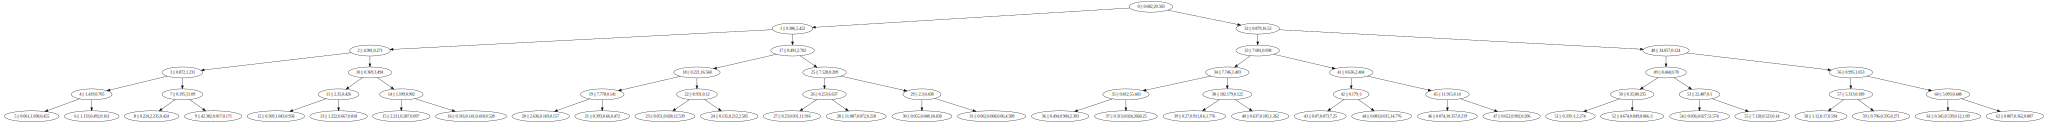

In [56]:
plot_tree(ParabelBisector(),homer_repre,static_args)

### representation : parabel

Fitting  63  classifiers...
Done fitting


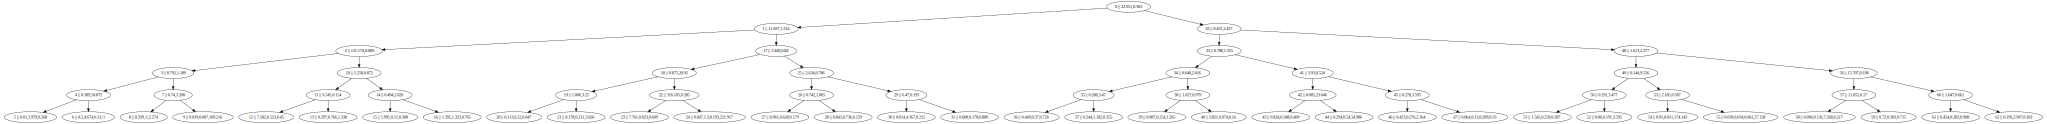

In [57]:
plot_tree(ParabelBisector(),parabel_repre,static_args)

# partitioner : Balanced K Means

### representation : HOMER

Fitting  63  classifiers...
Done fitting


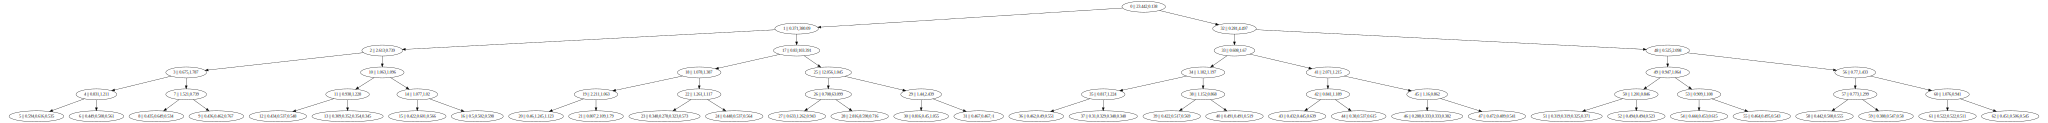

In [58]:
plot_tree(BalancedKMeansPartitioner(),homer_repre,static_args)

### representation : parabel

Fitting  63  classifiers...
Done fitting


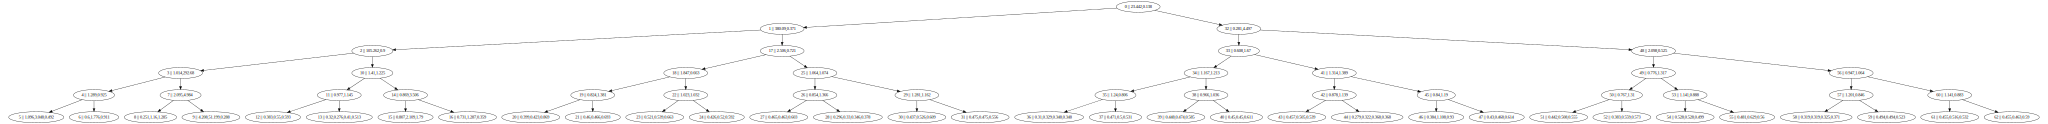

In [59]:
plot_tree(BalancedKMeansPartitioner(),parabel_repre,static_args)

# partitioner : K Means

### representation : HOMER

Fitting  157  classifiers...
Done fitting


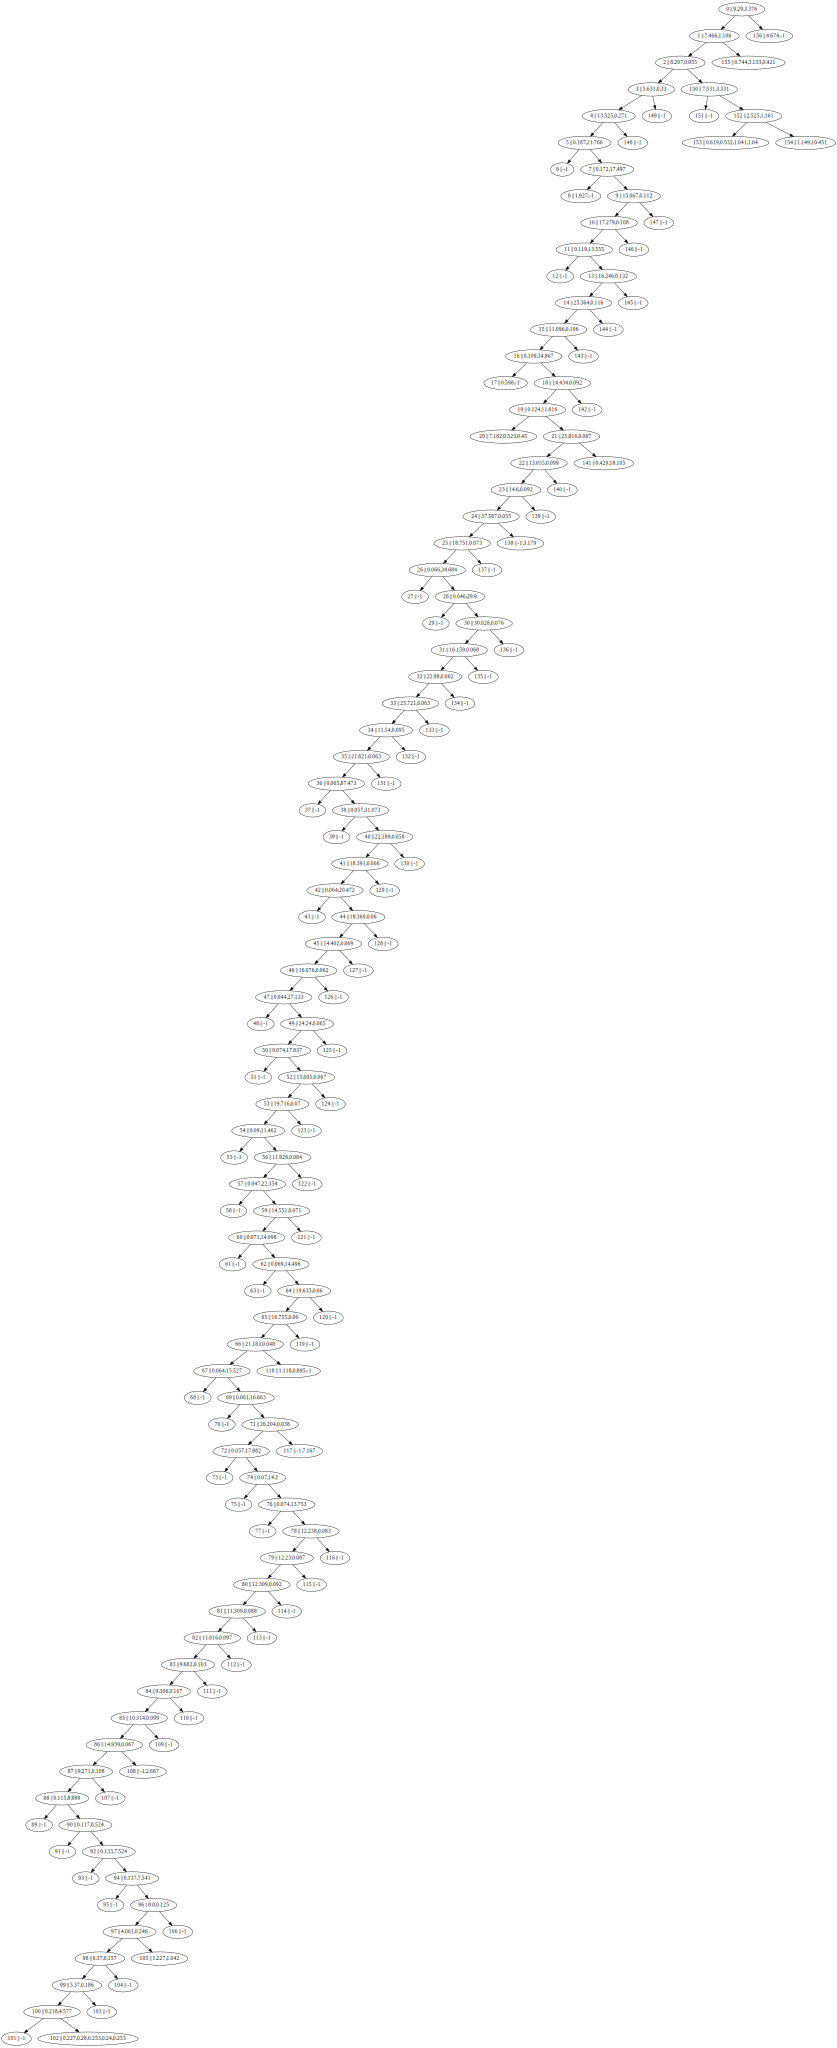

In [60]:
plot_tree(KMeansPartitioner(),homer_repre,static_args)

### representation : parabel

Fitting  149  classifiers...
Done fitting


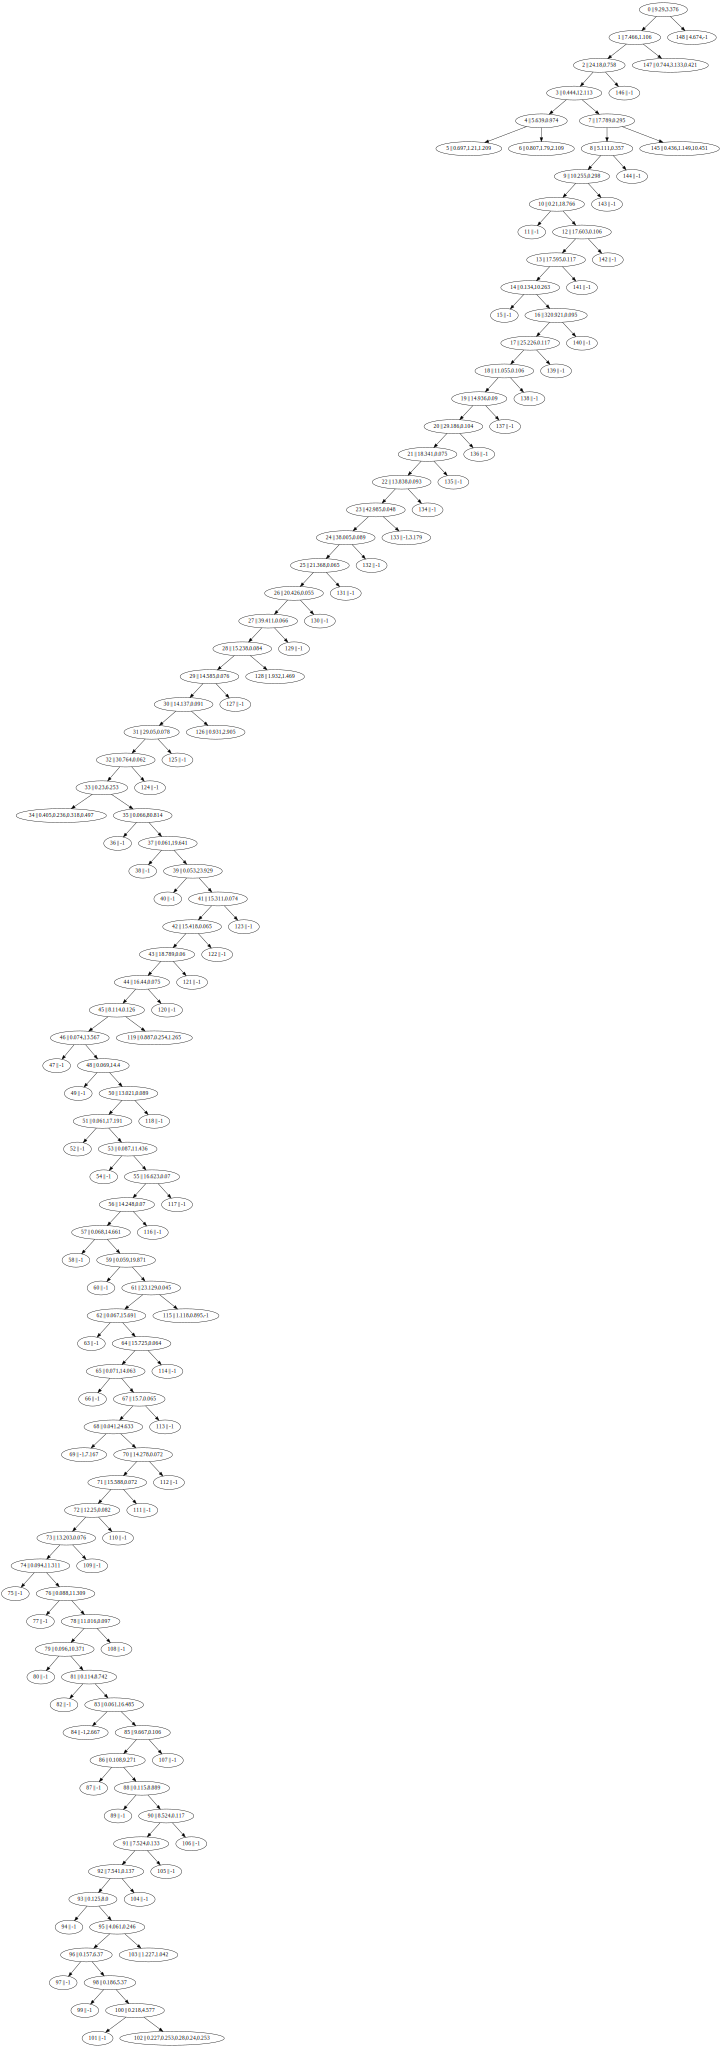

In [61]:
plot_tree(KMeansPartitioner(),parabel_repre,static_args)

# partitioner : SphericalKMeansPartitioner

### representation : HOMER

Fitting  65  classifiers...
Done fitting


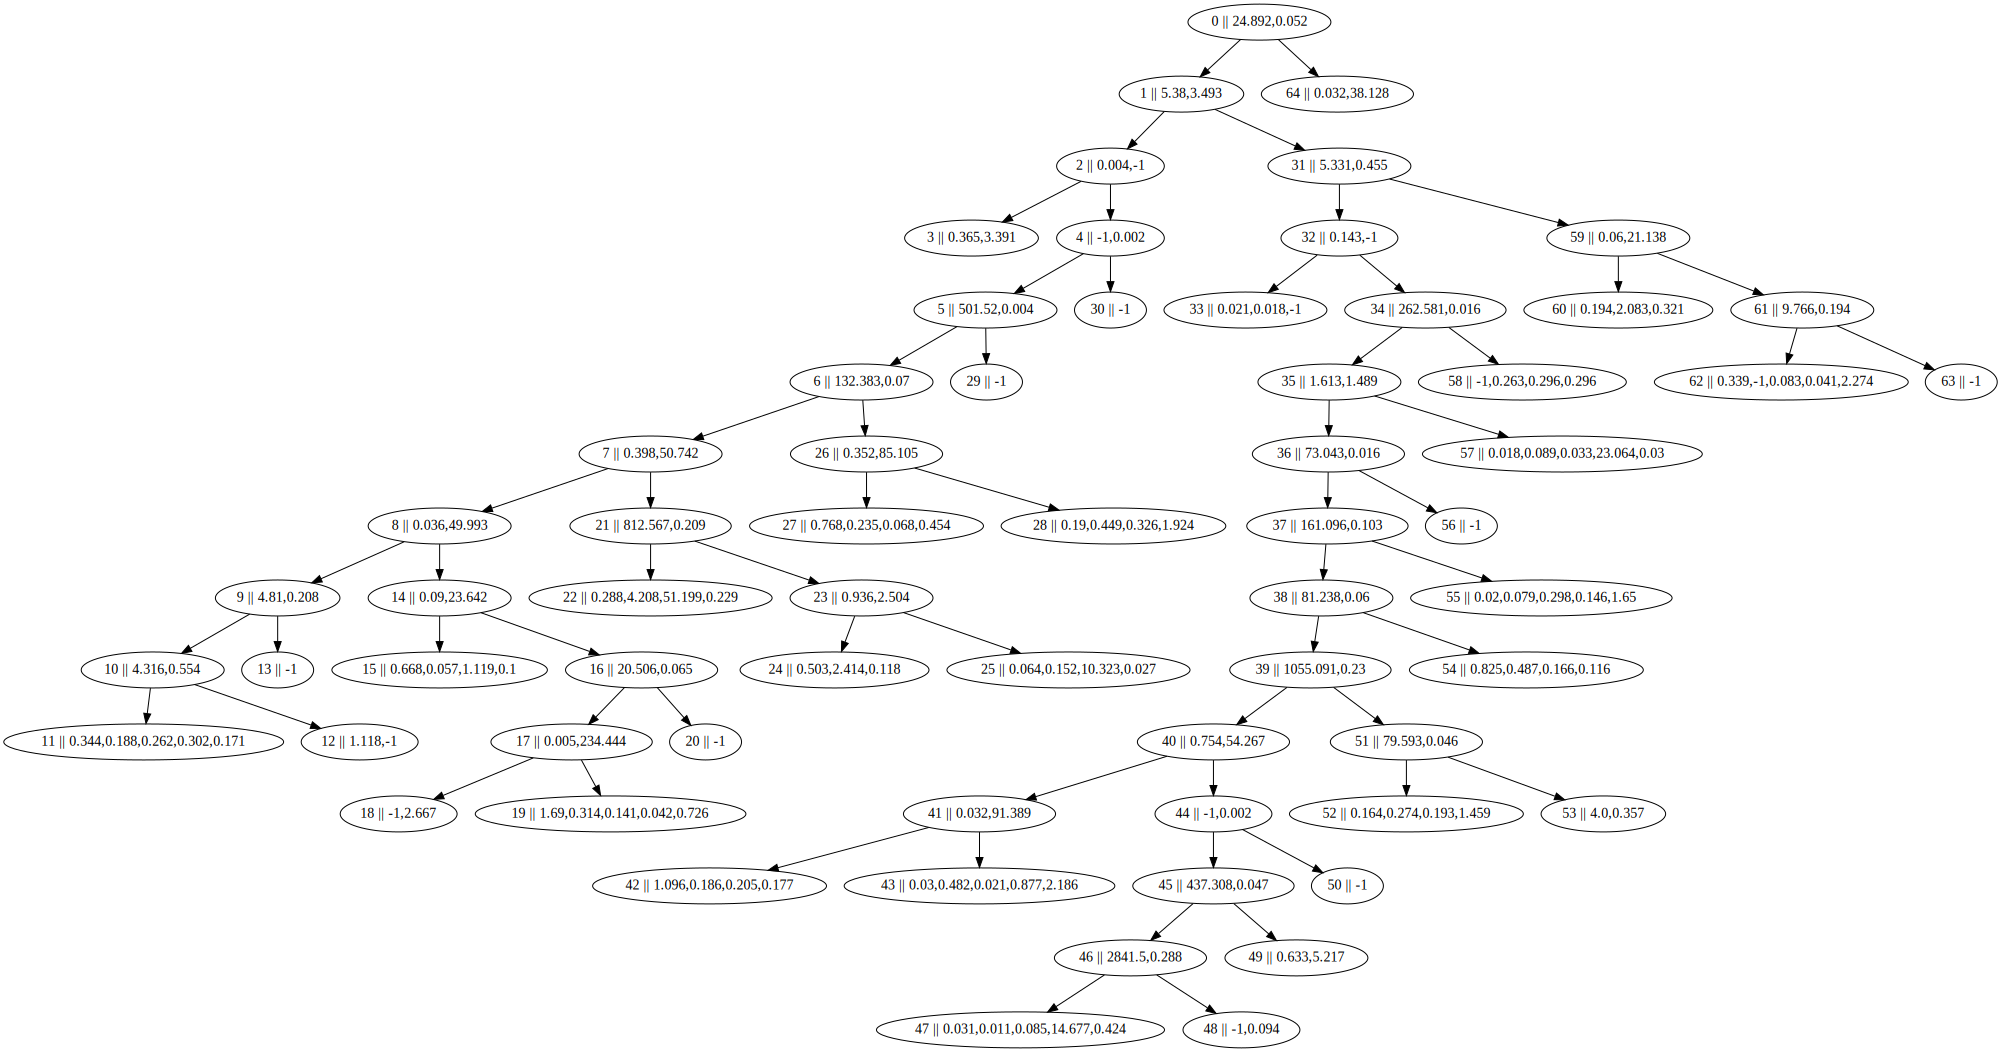

In [64]:
plot_tree(SphericalKMeansPartitioner(),homer_repre,static_args)

### representation : parabel

Fitting  79  classifiers...
Done fitting


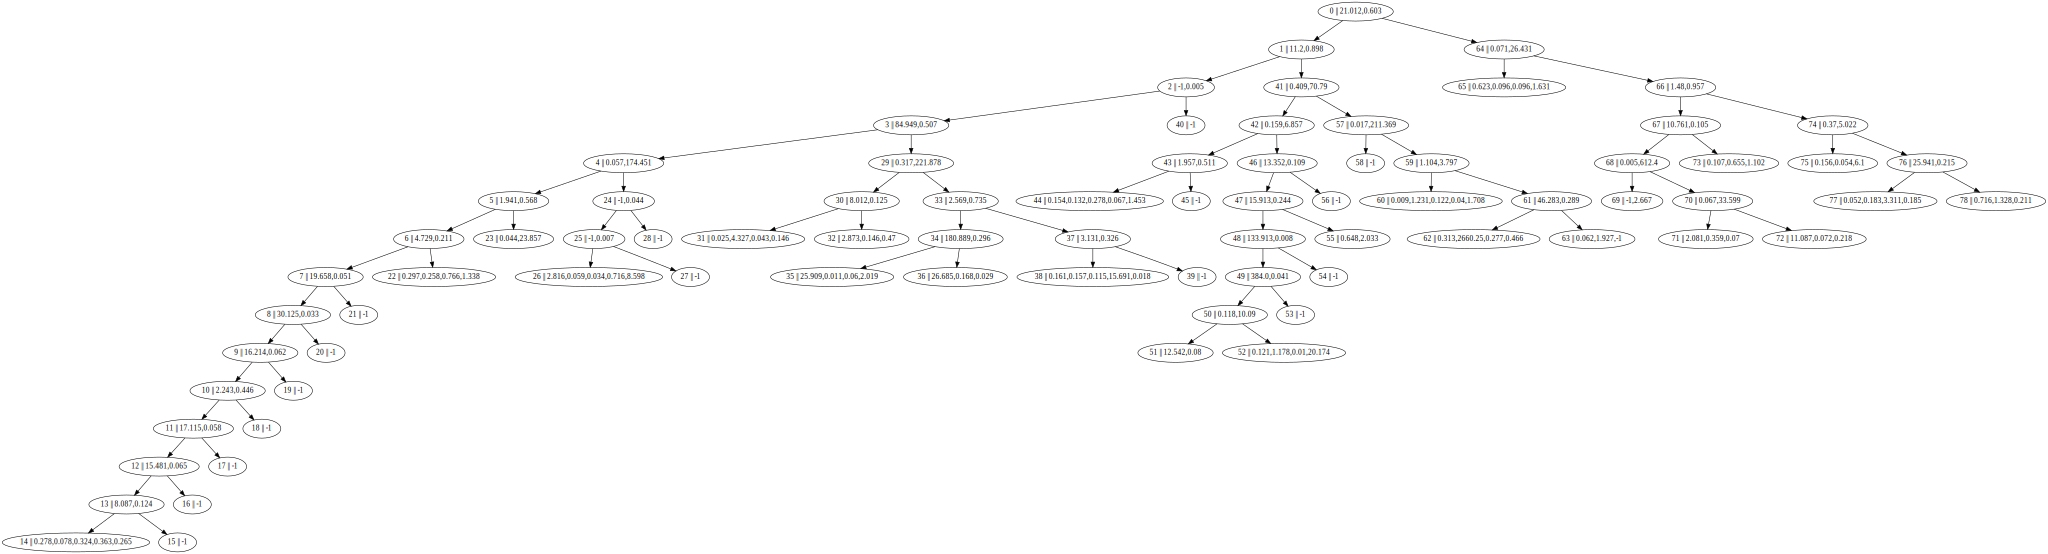

In [65]:
plot_tree(SphericalKMeansPartitioner(),parabel_repre,static_args)